<a href="https://colab.research.google.com/github/Harshil1335/express/blob/master/%22Harris_Hawk_Optimization_Based_Feature_Selection_for_High_Dimensional_Blood_Cancer_Classification%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
data = pd.read_csv('/content/Leukemia_GSE9476.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop rows or columns with missing values (if any)
data = data.dropna()

# Encode categorical labels in the 'type' column
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Separate features and target variable
X = data.drop('type', axis=1)
y = data['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN and other algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete.")

Missing values:
 samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     1
AFFX-ThrX-M_at     1
AFFX-TrpnX-3_at    1
AFFX-TrpnX-5_at    1
AFFX-TrpnX-M_at    1
Length: 22285, dtype: int64
Preprocessing complete.


## **Traditional FS Method**

## **ANOVA** and **RFE**


RFE completed in 0.03 seconds

ANOVA Test Accuracy: 40.00%
RFE Test Accuracy: 60.00%


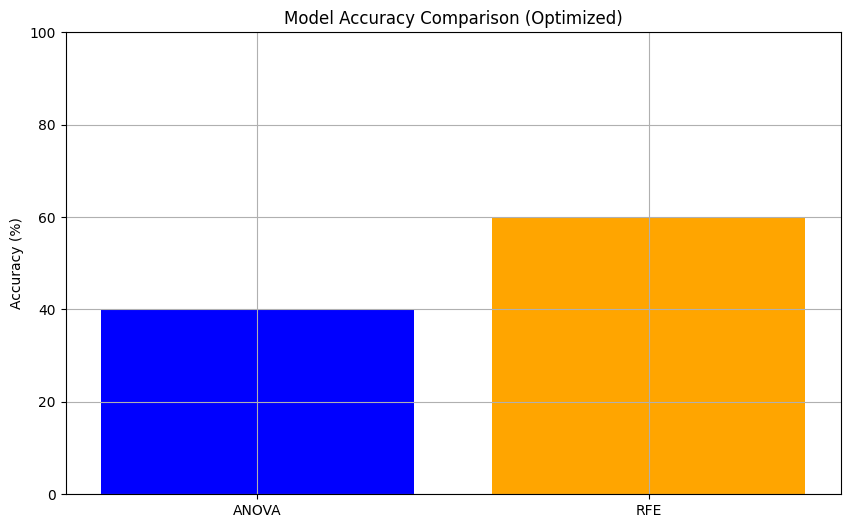

In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# ===============================================
# 1. Load dataset
# ===============================================
data = pd.read_csv('/content/Leukemia_GSE9476.csv')
X = data.drop('type', axis=1)
y = data['type']

# ===============================================
# 2. FIX: Impute missing values
# ===============================================
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# ===============================================
# 3. Train-test split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42
)

# ===============================================
# 4. Standardize features
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 5. Optimized ANOVA
# ===============================================
def optimized_anova(X_train, y_train, k=5):
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_train, y_train)
    return selector

anova_selector = optimized_anova(X_train_scaled, y_train, k=5)
X_train_anova = anova_selector.transform(X_train_scaled)
X_test_anova = anova_selector.transform(X_test_scaled)

knn_anova = KNeighborsClassifier(n_neighbors=11, weights='uniform', p=2)
knn_anova.fit(X_train_anova, y_train)
anova_acc = accuracy_score(y_test, knn_anova.predict(X_test_anova)) * 100

# ===============================================
# 6. Updated RFE
# ===============================================
def optimized_rfe(X_train, y_train):
    # Preselect fewer features
    pre_selector = SelectKBest(f_classif, k=50)
    X_pre = pre_selector.fit_transform(X_train, y_train)

    estimator = LogisticRegression(max_iter=100, solver='liblinear', C=0.05)
    rfe = RFE(estimator, n_features_to_select=5, step=10)

    start = time.time()
    rfe.fit(X_pre, y_train)
    print(f"RFE completed in {time.time()-start:.2f} seconds")

    return rfe, pre_selector

rfe_selector, pre_selector = optimized_rfe(X_train_scaled, y_train)

X_train_pre = pre_selector.transform(X_train_scaled)
X_test_pre = pre_selector.transform(X_test_scaled)
X_train_rfe = rfe_selector.transform(X_train_pre)
X_test_rfe = rfe_selector.transform(X_test_pre)

knn_rfe = KNeighborsClassifier(n_neighbors=13, weights='uniform', p=2)
knn_rfe.fit(X_train_rfe, y_train)
rfe_acc = accuracy_score(y_test, knn_rfe.predict(X_test_rfe)) * 100

# ===============================================
# 7. Results
# ===============================================
print(f"\nANOVA Test Accuracy: {anova_acc:.2f}%")
print(f"RFE Test Accuracy: {rfe_acc:.2f}%")

# ===============================================
# 8. Accuracy Comparison Plot
# ===============================================
plt.figure(figsize=(10,6))
plt.bar(['ANOVA', 'RFE'], [anova_acc, rfe_acc], color=['blue', 'orange'])
plt.title('Model Accuracy Comparison (Optimized)')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


### **Harris hawk Optimization**


===== Best Hyperparameters Found by HHO =====
k = 2
p = 2
weights = 'uniform'

Final Test Accuracy = 92.31%


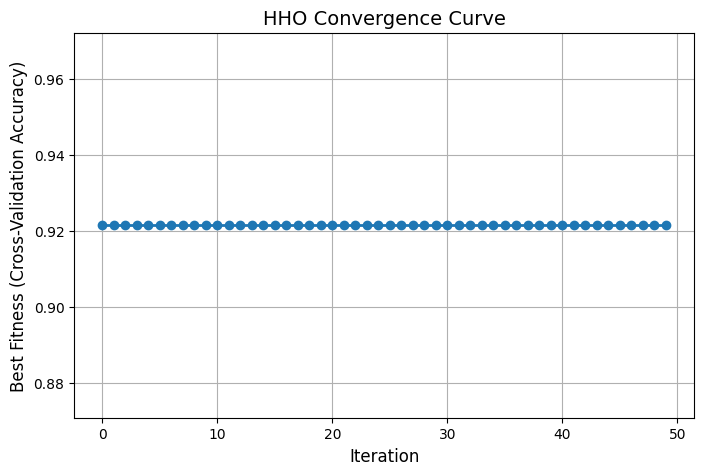

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ======================================
# Load dataset
# ======================================
data = pd.read_csv('/content/Leukemia_GSE9476.csv')
X = data.drop("type", axis=1)
y = data["type"]

# Fix NaN values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ======================================
# Define Fitness Function for HHO
# ======================================
def fitness_knn(params, X_train, y_train):
    k = max(1, min(5, int(round(params[0]))))  # restrict k to prevent CV errors
    p = 1 if params[1] < 1.5 else 2
    weights = "uniform" if params[2] < 0.5 else "distance"

    model = KNeighborsClassifier(n_neighbors=k, p=p, weights=weights)

    scores = cross_val_score(
        model, X_train, y_train,
        cv=3,            # Use 3-fold for small datasets
        n_jobs=-1,
        error_score=0    # Prevents failures → returns 0
    )
    return scores.mean()

# ======================================
# Harris Hawks Optimization (HHO)
# ======================================
def HHO(X_train, y_train, n_hawks=10, max_iter=50):

    lb = np.array([1, 1, 0], dtype=float)
    ub = np.array([5, 2, 1], dtype=float)  # restrict k to 1–5 for stability
    dim = 3

    hawks = np.random.uniform(lb, ub, (n_hawks, dim))

    best_fitness = -1
    best_hawk = hawks[0].copy()

    convergence = []

    for t in range(max_iter):

        fitness = np.zeros(n_hawks)

        for i in range(n_hawks):
            fitness[i] = fitness_knn(hawks[i], X_train, y_train)

        # Identify best hawk
        idx = np.argmax(fitness)
        if fitness[idx] > best_fitness:
            best_fitness = fitness[idx]
            best_hawk = hawks[idx].copy()

        convergence.append(best_fitness)

        # HHO Energy parameter
        E0 = 2 * np.random.rand() - 1
        E = 2 * E0 * (1 - t / max_iter)

        for i in range(n_hawks):
            r = np.random.rand()

            if abs(E) >= 1:  # Exploration
                q = np.random.rand()
                rand_hawk = hawks[np.random.randint(0, n_hawks)]
                hawks[i] = rand_hawk - q * abs(rand_hawk - 2 * np.random.rand() * hawks[i])

            else:  # Exploitation
                delta = best_hawk - hawks[i]
                if r >= 0.5:  # Soft besiege
                    hawks[i] = best_hawk - E * abs(delta)
                else:  # Hard besiege
                    jump = 2 * (1 - np.random.rand())
                    hawks[i] = best_hawk - E * abs(jump * best_hawk - hawks[i])

            # Enforce Bounds
            hawks[i] = np.clip(hawks[i], lb, ub)

    # Decode best parameters
    best_k = max(1, min(5, int(round(best_hawk[0]))))
    best_p = 1 if best_hawk[1] < 1.5 else 2
    best_weight = "uniform" if best_hawk[2] < 0.5 else "distance"

    return best_k, best_p, best_weight, convergence

# ======================================
# Run HHO Optimization
# ======================================
best_k, best_p, best_weight, convergence = HHO(X_train, y_train)

print("\n===== Best Hyperparameters Found by HHO =====")
print(f"k = {best_k}")
print(f"p = {best_p}")
print(f"weights = '{best_weight}'")

# ======================================
# Train Final KNN Model
# ======================================
model = KNeighborsClassifier(
    n_neighbors=best_k,
    p=best_p,
    weights=best_weight
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nFinal Test Accuracy = {accuracy:.2f}%")

# ======================================
# Plot Convergence Curve
# ======================================
#plt.figure(figsize=(8,5))
#plt.plot(convergence, marker='o', linewidth=2)
#plt.title("HHO Convergence Curve", fontsize=14)
#plt.xlabel("Iteration", fontsize=12)
#plt.ylabel("Best Fitness (Cross-Validation Accuracy)", fontsize=12)
#plt.grid(True)
#plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv('/content/Leukemia_GSE9476.csv')
print("Shape:", data.shape)
print(data.head())


Shape: (64, 22285)
   samples              type  1007_s_at   1053_at     117_at    121_at  \
0        1  Bone_Marrow_CD34   7.745245  7.811210   6.477916  8.841506   
1       12  Bone_Marrow_CD34   8.087252  7.240673   8.584648  8.983571   
2       13  Bone_Marrow_CD34   7.792056  7.549368  11.053504  8.909703   
3       14  Bone_Marrow_CD34   7.767265  7.094460  11.816433  8.994654   
4       15  Bone_Marrow_CD34   8.010117  7.405281   6.656049  9.050682   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Hs28SrRNA-5_at  \
0   4.546941  7.957714  5.344999  4.673364  ...                5.058849   
1   4.548934  8.011652  5.579647  4.828184  ...                4.436153   
2   4.549328  8.237099  5.406489  4.615572  ...                4.392061   
3   4.697018  8.283412  5.582195  4.903684  ...                4.633334   
4   4.514986  8.377046  5.493713  4.860754  ...                5.305192   

   AFFX-r2-Hs28SrRNA-M_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             

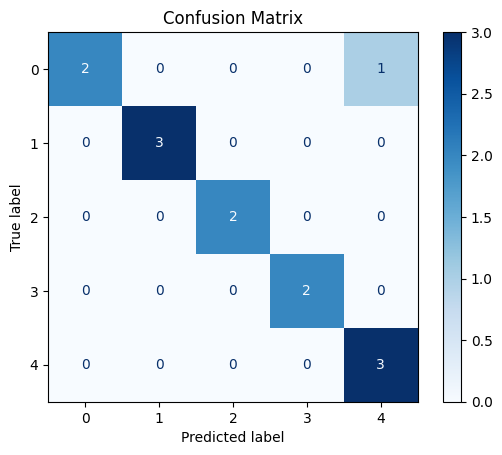

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                  precision    recall  f1-score   support

             AML       1.00      0.67      0.80         3
     Bone_Marrow       1.00      1.00      1.00         3
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         2
       PBSC_CD34       0.75      1.00      0.86         3

        accuracy                           0.92        13
       macro avg       0.95      0.93      0.93        13
    weighted avg       0.94      0.92      0.92        13



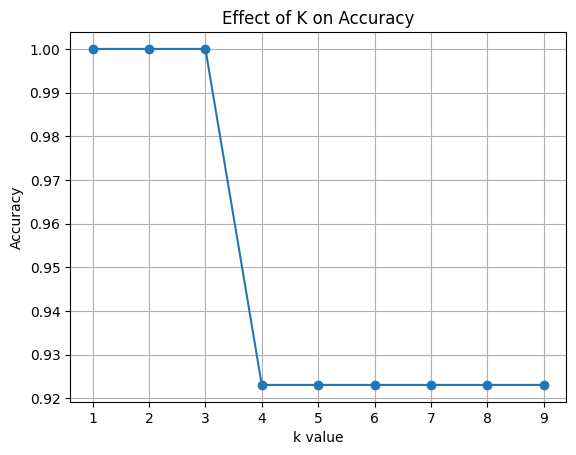

In [ ]:
acc_list = []
for k in range(1, 10):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    acc_list.append(knn_temp.score(X_test, y_pred))

plt.plot(range(1,10), acc_list, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Effect of K on Accuracy")
plt.grid(True)
plt.show()


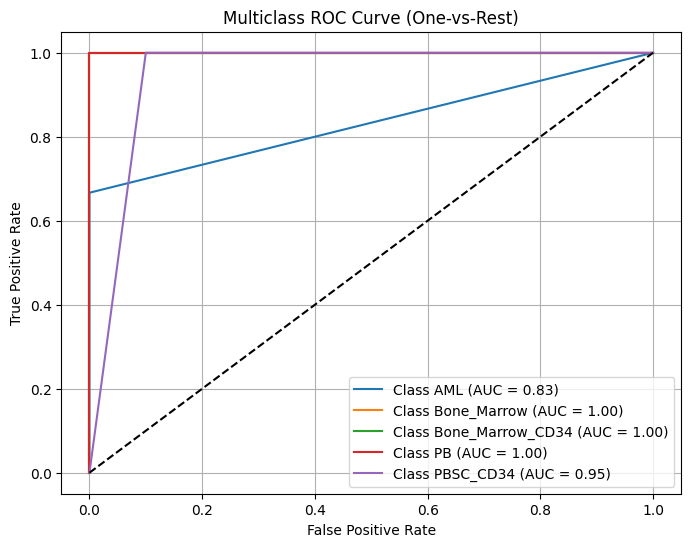

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Number of classes
classes = np.unique(y_test)
n_classes = len(classes)

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=classes)

# Get prediction probabilities
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
